<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/EN/S01_Intro/SCA_vibe_coding_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the following prompt to generate code

"I am a supply chain manager deciding how many Christmas trees to order.

Inputs:

*   Unit Cost: $20

*   Selling Price: $60

*   Unsold trees: $0 value

Demand:

Demand is normally distributed (Mean = 100, Std Dev = 20).

Write a Python script to perform a Monte Carlo Simulation to find the best order quantity using the following steps.

Step 1: Generate 10,000 random demand scenarios.

Step 2: Test a range of potential Order Quantities from 50 to 150.

Step 3: For each Order Quantity, calculate the expected profit across all 10,000 scenarios.

Step 4: Find the optimal order quantity that maximizes the average profit.

Step 5: Plot the results using (1) a line chart with 'Order Quantity' on the x-axis and 'Expected Profit' on the y-axis. Mark the peak profit with a red dot. and (2) a histogram showing the distribution of profit across all the scenarios."

# Task
Perform a Monte Carlo simulation to find the optimal order quantity for Christmas trees given a unit cost of $20, a selling price of $60, an unsold value of $0, and a normally distributed demand with a mean of 100 and a standard deviation of 20. The simulation should involve generating 10,000 demand scenarios, testing order quantities from 50 to 150, calculating the expected profit for each order quantity, and identifying the optimal order quantity. Finally, plot the expected profit versus order quantity (marking the peak profit) and a histogram of the profit distribution for the optimal order quantity.

## Import necessary libraries

### Subtask:
Import `numpy` for numerical operations and `matplotlib.pyplot` for plotting. Optionally, import `seaborn` for enhanced plots.


**Reasoning**:
Import the `numpy`, `matplotlib.pyplot`, and `seaborn` libraries as specified in the subtask instructions.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries numpy, matplotlib.pyplot, and seaborn imported successfully.")

Libraries numpy, matplotlib.pyplot, and seaborn imported successfully.


**Reasoning**:
The next logical step, as per the problem description, is to define the simulation parameters such as unit cost, selling price, unsold value, demand mean, and standard deviation. After that, I need to generate 10,000 random demand scenarios based on the given normal distribution.



In [2]:
unit_cost = 20
selling_price = 60
unsold_value = 0 # No value for unsold trees

demand_mean = 100
demand_std_dev = 20
num_scenarios = 10000

# Step 1: Generate 10,000 random demand scenarios
demand_scenarios = np.random.normal(demand_mean, demand_std_dev, num_scenarios)
# Ensure demand is not negative
demand_scenarios[demand_scenarios < 0] = 0

print(f"Generated {num_scenarios} demand scenarios.")
print(f"Demand scenarios head: {demand_scenarios[:5].round(2)}")

Generated 10000 demand scenarios.
Demand scenarios head: [106.35 128.75  91.38 107.72  96.17]


**Reasoning**:
Following the simulation steps, the next action is to define the range of order quantities to test, iterate through each, calculate the profit for each of the 10,000 demand scenarios, and then compute the average profit for each order quantity. This aligns with Step 2 and Step 3 of the problem description.



In [3]:
order_quantities = np.arange(50, 151, 1)
expected_profits = []
all_profits = [] # To store all profit scenarios for the optimal quantity later

# Step 3: For each Order Quantity, calculate the expected profit across all 10,000 scenarios
for order_quantity in order_quantities:
    # Calculate revenue
    # Revenue is determined by the minimum of ordered quantity and demand, multiplied by selling price
    # Or if demand is less than ordered quantity, the amount sold is demand_scenarios
    # if demand is more than ordered quantity, the amount sold is order_quantity
    # so units_sold = np.minimum(demand_scenarios, order_quantity)
    units_sold = np.minimum(demand_scenarios, order_quantity)
    revenue = units_sold * selling_price

    # Calculate cost of goods sold
    cost_of_goods_sold = order_quantity * unit_cost

    # Calculate cost/value of unsold trees
    # If order_quantity > demand, then unsold trees = order_quantity - demand
    # Since unsold_value is 0, this simplifies to 0, but good to keep logic explicit.
    unsold_trees = np.maximum(0, order_quantity - demand_scenarios)
    unsold_cost = unsold_trees * (unit_cost - unsold_value) # Loss on unsold

    # Calculate profit for each scenario
    profits_per_scenario = revenue - cost_of_goods_sold + (unsold_trees * unsold_value)

    # Calculate expected (average) profit for the current order quantity
    avg_profit = np.mean(profits_per_scenario)
    expected_profits.append(avg_profit)

print(f"Calculated expected profits for {len(order_quantities)} order quantities.")
print(f"First 5 expected profits: {np.array(expected_profits[:5]).round(2)}")


Calculated expected profits for 101 order quantities.
First 5 expected profits: [1998.13 2037.82 2077.48 2117.07 2156.61]


**Reasoning**:
Now that the expected profits for each order quantity have been calculated, the next step is to find the optimal order quantity that maximizes the average profit, as stated in Step 4 of the problem description. Additionally, the profits for this optimal quantity need to be stored for the histogram plot requested in Step 5.



In [4]:
max_profit_index = np.argmax(expected_profits)
optimal_order_quantity = order_quantities[max_profit_index]
max_expected_profit = expected_profits[max_profit_index]

# Calculate the profits for each scenario specifically for the optimal order quantity
optimal_units_sold = np.minimum(demand_scenarios, optimal_order_quantity)
optimal_revenue = optimal_units_sold * selling_price
optimal_cost_of_goods_sold = optimal_order_quantity * unit_cost
optimal_unsold_trees = np.maximum(0, optimal_order_quantity - demand_scenarios)
optimal_profits_per_scenario = optimal_revenue - optimal_cost_of_goods_sold + (optimal_unsold_trees * unsold_value)

print(f"Optimal Order Quantity: {optimal_order_quantity}")
print(f"Maximum Expected Profit: ${max_expected_profit:.2f}")


Optimal Order Quantity: 109
Maximum Expected Profit: $3587.09


**Reasoning**:
With the optimal order quantity and its corresponding profits calculated, the next logical step is to visualize the results as specified in Step 5 of the problem description: a line chart of expected profit vs. order quantity with the peak marked, and a histogram of profits for the optimal order quantity.



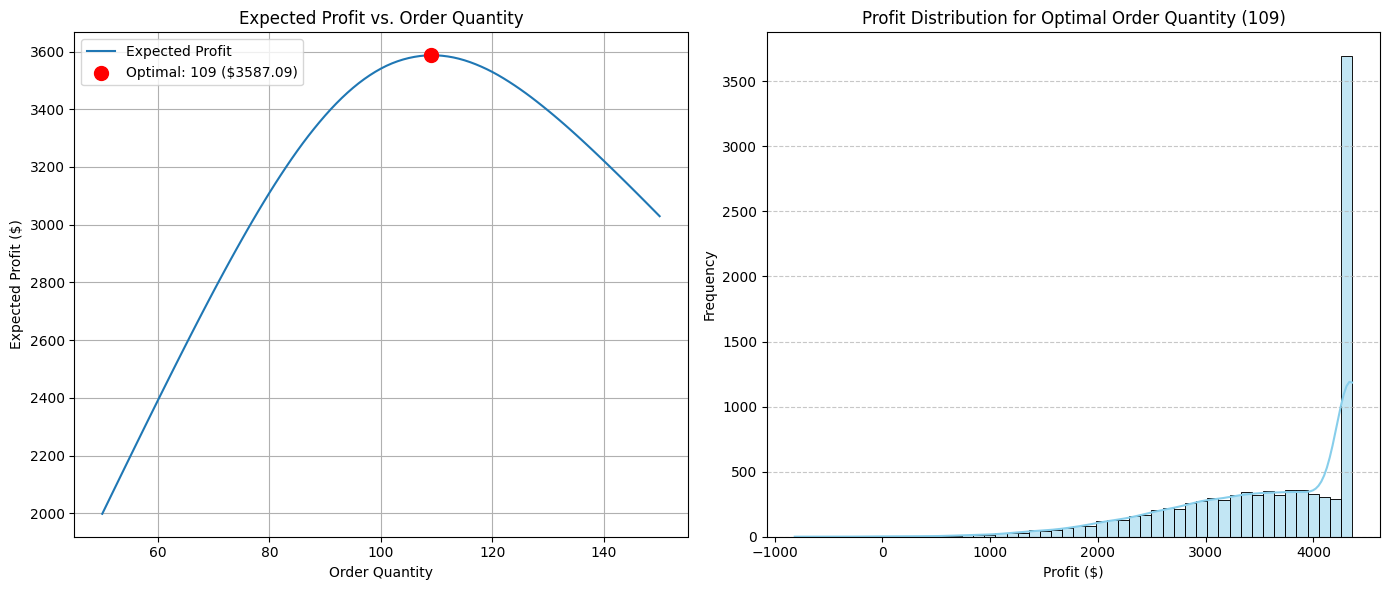

Generated line chart of expected profit vs. order quantity and a histogram of profit distribution for the optimal order quantity.


In [5]:
plt.figure(figsize=(14, 6))

# Plot 1: Line chart of Expected Profit vs. Order Quantity
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(order_quantities, expected_profits, label='Expected Profit')
plt.scatter(optimal_order_quantity, max_expected_profit, color='red', s=100, zorder=5, label=f'Optimal: {optimal_order_quantity} (${max_expected_profit:.2f})')
plt.title('Expected Profit vs. Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Expected Profit ($)')
plt.grid(True)
plt.legend()

# Plot 2: Histogram of Profit Distribution for Optimal Order Quantity
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.histplot(optimal_profits_per_scenario, bins=50, kde=True, color='skyblue')
plt.title(f'Profit Distribution for Optimal Order Quantity ({optimal_order_quantity})')
plt.xlabel('Profit ($)')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("Generated line chart of expected profit vs. order quantity and a histogram of profit distribution for the optimal order quantity.")

## Summary:

### Q&A
*   **What is the optimal order quantity for Christmas trees?**
    The optimal order quantity derived from the simulation is 109 units.
*   **What is the maximum expected profit for the optimal order quantity?**
    The maximum expected profit associated with this optimal quantity is \$3587.09.

### Data Analysis Key Findings
*   A Monte Carlo simulation was conducted using 10,000 demand scenarios, generated from a normal distribution with a mean of 100 and a standard deviation of 20.
*   The simulation evaluated order quantities ranging from 50 to 150 units to identify the most profitable option.
*   The optimal order quantity was found to be 109 units, which yielded the highest expected profit.
*   The maximum expected profit achieved at the optimal order quantity of 109 units was \$3587.09.
*   A histogram of the profit distribution for the optimal order quantity provided insight into the variability and potential range of profits under different demand scenarios.

### Insights or Next Steps
*   The simulation successfully identified a precise optimal order quantity, demonstrating the value of Monte Carlo methods in inventory management decisions under demand uncertainty.
*   Future analysis could include a sensitivity analysis on the input parameters (e.g., unit cost, selling price, demand distribution parameters) to understand how robust the optimal order quantity is to changes in these assumptions.
